# The Sparks Foundation

## Data Science and Business Analytics

### Task 4: Exploratory Data Analysis - Global Terrorism

#### By Kathakoli Sengupta 


This task's aim is to find out the hot zones of terrorism as a security/defense analyst

## Importing libraries

In [1]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
df=pd.read_csv("C:/Users/Kathakoli/Desktop/globalterrorismdbdist.csv", encoding='ISO-8859-1')

In [3]:
df.head(5)

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  1.970000e+11   1970       7     2        NaN         0        NaN       58   
1  1.970000e+11   1970       0     0        NaN         0        NaN      130   
2  1.970010e+11   1970       1     0        NaN         0        NaN      160   
3  1.970010e+11   1970       1     0        NaN         0        NaN       78   
4  1.970010e+11   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [4]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [6]:
df=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [7]:
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'state', 'Region', 'city',
       'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target',
       'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')

In [8]:
df.head()

Year  Month  Day             Country    state                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   
2  1970      1    0         Philippines   Tarlac               Southeast Asia   
3  1970      1    0              Greece   Attica               Western Europe   
4  1970      1    0               Japan  Fukouka                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target Summary  \
0     1.0      0.0             Julio Guzman     NaN   
1     0.0      0.0  Nadine Chaval, daughter     NaN   
2     1.0      0.0                 Employee     NaN   
3     NaN      NaN             U.S. Embassy     NaN   
4     NaN      NaN           U.S. Consulate     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  Weapon_type Motive  
0     Unknown    NaN  
1     Unknown    NaN  
2     Unknown    NaN  
3  Explosives    NaN  
4  Incendiary    NaN

In [9]:
# Checking for the null values 
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

## Data Checking

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [11]:
df.describe()

Year          Month            Day       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean     2002.638997       6.467277      15.505644      23.498343   
std        13.259430       3.388303       8.814045      18.569242   
min      1970.000000       0.000000       0.000000     -53.154613   
25%      1991.000000       4.000000       8.000000      11.510046   
50%      2009.000000       6.000000      15.000000      31.467463   
75%      2014.000000       9.000000      23.000000      34.685087   
max      2017.000000      12.000000      31.000000      74.633553   

          longitude         Killed        Wounded  
count  1.771340e+05  171378.000000  165380.000000  
mean  -4.586957e+02       2.403272       3.167668  
std    2.047790e+05      11.545741      35.949392  
min   -8.618590e+07       0.000000       0.000000  
25%    4.545640e+00       0.000000       0.000000  
50%    4.324651e+01       0.000000       0.000000  
75%    6.871033e+01       2.000000       2.000000  
max    1.793667e+02    1570.000000    8191.000000

## Data Visualization

### Hot Zone Country

In [12]:
count_attack = df.Country.value_counts()[:10]
count_attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

([<matplotlib.patches.Wedge at 0x1a40d11b358>,
 [Text(0.7857785129536577, 0.7697740763239163, 'Iraq'),
  Text(-0.46003379503917613, 0.9991841208815588, 'Pakistan'),
  Text(-1.0550950330500464, 0.3110859547345747, 'Afghanistan'),
  Text(-0.9705026126165458, -0.5178075693773307, 'India'),
  Text(-0.47157142152288667, -0.9937909208696183, 'Colombia'),
  Text(0.03916882103405774, -1.0993024167438195, 'Philippines'),
  Text(0.473259188827646, -0.9929882880428141, 'Peru'),
  Text(0.7920971400527258, -0.7632706733002996, 'El Salvador'),
  Text(0.9976589322052719, -0.46333212169138116, 'United Kingdom'),
  Text(1.0899859849122417, -0.14808967788097394, 'Turkey')])

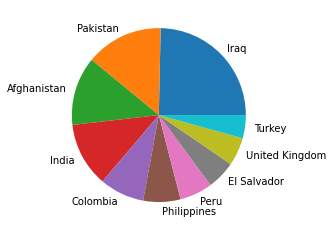

In [13]:
fig, ax = plt.subplots()
labels = df['Country'].value_counts().index[:10]
values = df['Country'].value_counts().values[:10]
ax.pie(values, labels=labels)

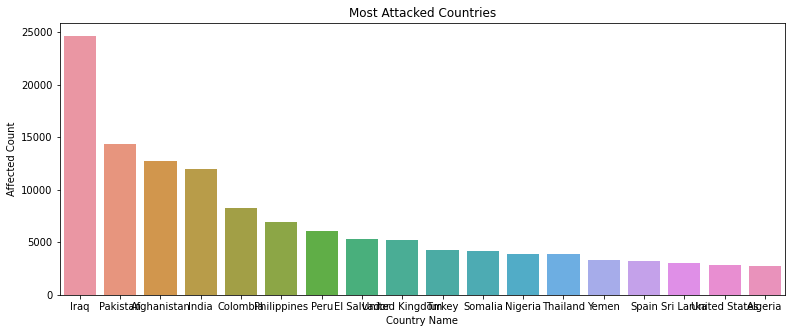

In [14]:
#Plotting 
plt.subplots(figsize=(13,5))
sns.barplot(df['Country'].value_counts()[:18].index,df['Country'].value_counts()[:18].values,)
plt.title('Most Attacked Countries')
plt.xlabel('Country Name')
plt.ylabel('Affected Count')
plt.show()

### Hot Zone City 

In [15]:
city_attack = df.city.value_counts()[:15]
city_attack

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Bogota           984
Kirkuk           925
Beirut           918
Medellin         848
Name: city, dtype: int64

([<matplotlib.patches.Wedge at 0x1a40d2d6390>,
 [Text(0.6474805061767406, 0.8892519295009216, 'Unknown'),
  Text(-0.9503153479108722, 0.5539862268369476, 'Baghdad'),
  Text(-0.9863695784907124, -0.4869035372926085, 'Karachi'),
  Text(-0.647737433448548, -0.8890647992747706, 'Lima'),
  Text(-0.20157618902667213, -1.0813727572014582, 'Mosul'),
  Text(0.26461985282304273, -1.0676967422877675, 'Belfast'),
  Text(0.6284946138478933, -0.9027704693687026, 'Santiago'),
  Text(0.8728579438992841, -0.669416917751497, 'Mogadishu'),
  Text(1.032582705948339, -0.3791740436480408, 'San Salvador'),
  Text(1.0944014579855015, -0.11083974359050472, 'Istanbul')])

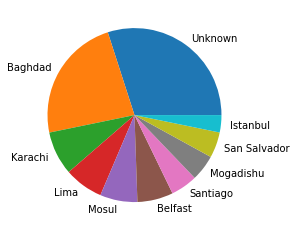

In [16]:
fig, ax = plt.subplots()
labels = df['city'].value_counts().index[:10]
values = df['city'].value_counts().values[:10]
ax.pie(values, labels=labels)

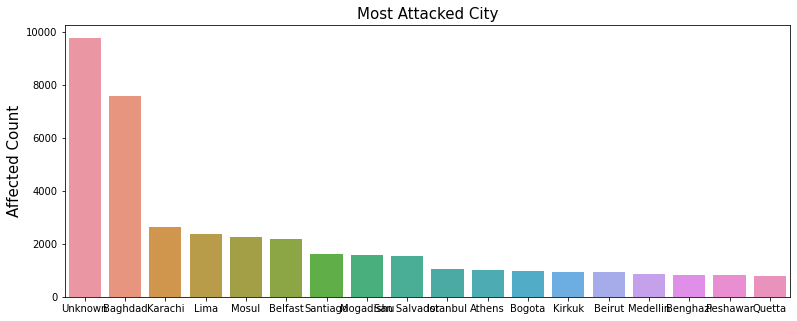

In [17]:
# Plotting Most Attacked City
plt.subplots(figsize=(13,5))
sns.barplot(df['city'].value_counts()[:18].index,df['city'].value_counts()[:18].values,)
plt.ylabel("Affected Count",fontsize=15)
plt.title("Most Attacked City",fontsize=15)
plt.show()

## Hot Zone State

In [18]:
state_attack = df.state.value_counts()[:10]
state_attack

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: state, dtype: int64

([<matplotlib.patches.Wedge at 0x1a40d326a20>,
 [Text(0.9021203946238187, 0.6294273537142836, 'Baghdad'),
  Text(-0.006617829301799861, 1.09998009269956, 'Northern Ireland'),
  Text(-0.7139178472101688, 0.8368520224237963, 'Unknown'),
  Text(-1.0717747466941243, 0.24758613117205513, 'Balochistan'),
  Text(-1.0368776003015392, -0.3672667177854829, 'Saladin'),
  Text(-0.7050088356141554, -0.8443710924149245, 'Al Anbar'),
  Text(-0.19103217877611506, -1.0832851455974326, 'Nineveh'),
  Text(0.36598576537750316, -1.0373304292948526, 'Sindh'),
  Text(0.8194017354720977, -0.7338806414569842, 'Khyber Pakhtunkhwa'),
  Text(1.0678614962793855, -0.2639542095969533, 'Diyala')])

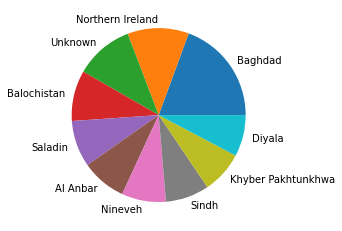

In [19]:
fig, ax = plt.subplots()
labels = df['state'].value_counts().index[:10]
values = df['state'].value_counts().values[:10]
ax.pie(values, labels=labels)

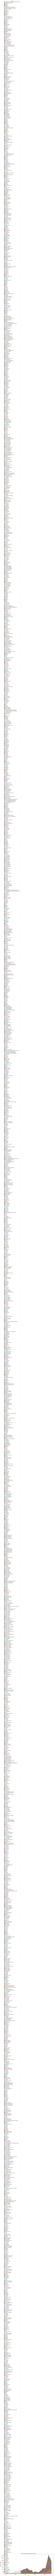

In [20]:
#Plotting The Most Attacked State

pd.crosstab(df.Year, df.state).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

### Year affected by most terrorism

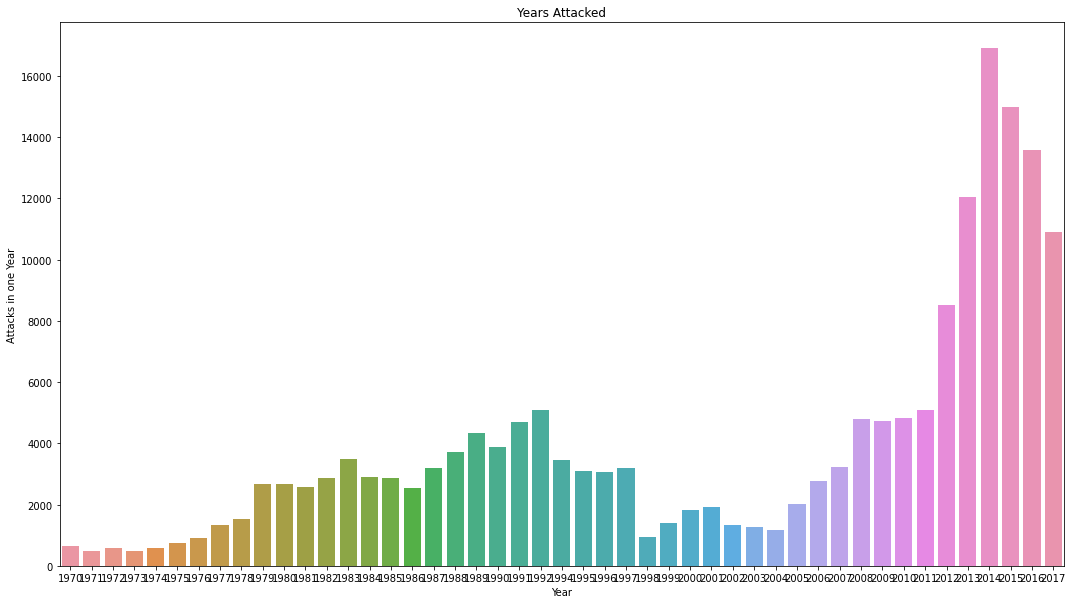

In [21]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years)
plt.xlabel('Year')
plt.ylabel('Attacks in one Year')
plt.title('Years Attacked')
plt.show()

### Group attacking most

In [22]:
groupattack = df.Group.value_counts()[:10]
groupattack

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group, dtype: int64

([<matplotlib.patches.Wedge at 0x1a40d2a2ba8>,
 [Text(-0.6605664636834379, 0.8795748672266379, 'Unknown'),
  Text(-0.09056229868792254, -1.096265693185899, 'Taliban'),
  Text(0.2911185040924893, -1.0607780241761005, 'Islamic State of Iraq and the Levant (ISIL)'),
  Text(0.5654575751372386, -0.9435347003263391, 'Shining Path (SL)'),
  Text(0.750959166414397, -0.8037787819905389, 'Farabundo Marti National Liberation Front (FMLN)'),
  Text(0.8811719937368905, -0.6584344443099507, 'Al-Shabaab'),
  Text(0.9759076760680463, -0.5075472468563548, "New People's Army (NPA)"),
  Text(1.0392321650143117, -0.36055028387128835, 'Irish Republican Army (IRA)'),
  Text(1.0789523971996586, -0.21415350703901667, 'Revolutionary Armed Forces of Colombia (FARC)'),
  Text(1.0976986967184408, -0.07111660300265094, 'Boko Haram')])

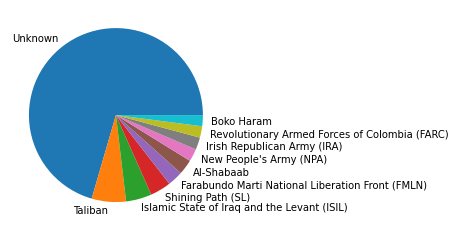

In [23]:
fig, ax = plt.subplots()
labels = df['Group'].value_counts().index[:10]
values = df['Group'].value_counts().values[:10]
ax.pie(values, labels=labels)

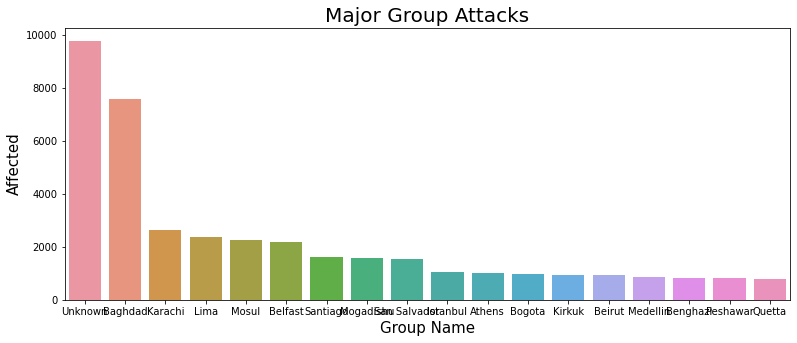

In [24]:
### Plotting the Major Group Attacks

plt.subplots(figsize=(13,5))
sns.barplot(df['city'].value_counts()[:18].index,df['city'].value_counts()[:18].values,)
plt.title("Major Group Attacks",fontsize=20)
plt.xlabel("Group Name",fontsize=15)
plt.ylabel("Affected",fontsize=15)
plt.show()

## Death Number

In [25]:
death = df.loc[:,'Killed']
print('Total death rate is:', int(sum(death.dropna())))

Total death rate is: 411868


## Conclusion

In [26]:
print("Country with highest attacks:",df['Country'].value_counts().idxmax())
print("City with highest attacks:",df['city'].value_counts().index[1]) 
print("State with highest attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Most Frequent terrorist groups:",df['Group'].value_counts().index[1])
print("Frequently used Attack types",df['AttackType'].value_counts().idxmax())

Country with highest attacks: Iraq
City with highest attacks: Baghdad
State with highest attacks: Middle East & North Africa
Year with the most attacks: 2014
Most Frequent terrorist groups: Taliban
Frequently used Attack types Bombing/Explosion


## The conclusions regarding the hot zones as a security analyst is 

#### 1. The country that is the hot zone of attack is Iraq.
#### 2. The current hot zone state is Middle East and North Africa.
#### 3. The current hot zone city is Baghdad.
#### 4. The frequently used tool for the attacks are armed attack or bombing.
#### 5. The most frequent terrorist groups are the Talibans.